In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import h5py

from mpl_toolkits.mplot3d import axes3d
%matplotlib widget

In [2]:
Nc=4
Nf=1

In [3]:
Ns=32
Nt=8

In [4]:
gstar_HSDM = 2*(Nc**2-1)+2*Nf**2
gstar_SM = 106.75
gstar = gstar_SM + gstar_HSDM

In [5]:
MP_GeV = 1.220890 * 10**19 # GeV https://physics.nist.gov/cgi-bin/cuu/Value?plkmc2gev

In [6]:
beta_m_t0hats = np.loadtxt("t0hats.dat")
beta_m_MBhats = np.loadtxt("MBhats.dat")

# Get interpolating/extrapolating functions

In [7]:
# def fitter( x, c0, c1_0, c1_1, c2_00, c2_01, c2_11 ):
#     ainv = x.T[0]
#     M = x.T[1]
#     return c0 + c1_0*ainv + c1_1*M + c2_00*ainv*ainv + c2_01*ainv*M + c2_11*M*M

In [12]:
def fitter( x, c0, c1_0, c1_1, c2_01, c2_11 ):
    ainv = x.T[0]
    M = x.T[1]
    return c0 + c1_0*ainv + c1_1*M + c2_01*ainv*M + c2_11*M*M

In [13]:
# ainv as a func of beta and mqhat

x1 = beta_m_t0hats.T[0][3:]
x2 = beta_m_t0hats.T[1][3:]

xx = np.array([x1, x2]).T
yy = np.sqrt( beta_m_t0hats.T[2][3:] )
dyy = 0.5 * beta_m_t0hats.T[3][3:]/yy

opt_ainv_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
fit_yy = fitter( xx, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4] )

In [14]:
# # ainv as a func of beta and mqhat

# x1 = beta_m_t0hats.T[0][3:]
# x2 = beta_m_t0hats.T[1][3:]

# xx = np.array([x1, x2]).T
# yy = np.sqrt( beta_m_t0hats.T[2][3:] )
# dyy = 0.5 * beta_m_t0hats.T[3][3:]/yy

# opt_ainv_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
# fit_yy = fitter( xx, 
#                 opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
#                 opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
#                 opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [15]:
opt_ainv_beta_mqhat

(array([-24.52972181,   2.36716498,  20.17352904,  -1.99772661,
          3.09166529]),
 array([[ 6.40674247e+00, -5.87245091e-01, -1.95173536e+01,
          1.80698447e+00, -5.96998516e-01],
        [-5.87245091e-01,  5.38283740e-02,  1.78730054e+00,
         -1.65484937e-01,  5.48367607e-02],
        [-1.95173536e+01,  1.78730054e+00,  6.37419779e+01,
         -5.88451893e+00,  1.69815042e+00],
        [ 1.80698447e+00, -1.65484937e-01, -5.88451893e+00,
          5.43335214e-01, -1.58185144e-01],
        [-5.96998516e-01,  5.48367607e-02,  1.69815042e+00,
         -1.58185144e-01,  6.79543488e-02]]))

In [16]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.scatter( x1, x2, yy )
# # zuplims=yy+dyy
# # zlolims=yy-dyy
# # estep = 1
# # ax.errorbar( x1, x2, yy, 0.01, zuplims=zuplims, zlolims=zlolims, errorevery=estep, ls='none')

# # ax.scatter( x1, x2, fit_yy )

# xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
# xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
# fit_yy = fitter( np.array([xx1,xx2]).T, 
#                 opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
#                 opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
#                 opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

# ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

# ax.view_init(elev=25, azim=-80, roll=0)

# ax.set_xlabel("$\\beta$")
# ax.set_ylabel("$\\hat{m}_q$")
# ax.set_zlabel("$a^{-1}\\sqrt{t_0}$")

# plt.savefig("ainv.pdf", bbox_inches='tight')

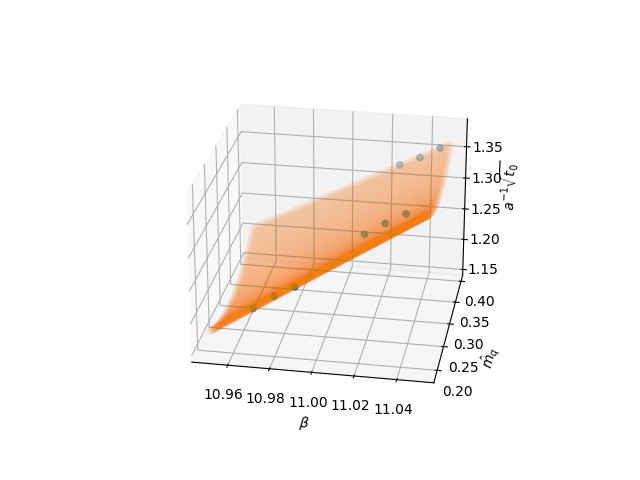

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter( x1, x2, yy )
# zuplims=yy+dyy
# zlolims=yy-dyy
# estep = 1
# ax.errorbar( x1, x2, yy, 0.01, zuplims=zuplims, zlolims=zlolims, errorevery=estep, ls='none')

# ax.scatter( x1, x2, fit_yy )

xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
fit_yy = fitter( np.array([xx1,xx2]).T, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4] )

ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

ax.view_init(elev=25, azim=-80, roll=0)

ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\\hat{m}_q$")
ax.set_zlabel("$a^{-1}\\sqrt{t_0}$")

plt.savefig("ainv.pdf", bbox_inches='tight')

In [18]:
fit_yy

array([[1.17904417, 1.17794075, 1.17686514, ..., 1.20155179, 1.20314712,
        1.20477026],
       [1.18105184, 1.17994414, 1.17886425, ..., 1.20314427, 1.20473531,
        1.20635417],
       [1.18305952, 1.18194753, 1.18086337, ..., 1.20473674, 1.2063235 ,
        1.20793809],
       ...,
       [1.37378852, 1.37226989, 1.37077909, ..., 1.3560218 , 1.35720192,
        1.35840987],
       [1.37579619, 1.37427328, 1.3727782 , ..., 1.35761427, 1.35879012,
        1.35999378],
       [1.37780386, 1.37627668, 1.37477731, ..., 1.35920675, 1.36037831,
        1.36157769]])

In [19]:
np.savetxt( "./coeffs_ainv_beta_mqhat.dat", opt_ainv_beta_mqhat[0])
np.savetxt( "./cov_ainv_beta_mqhat.dat", opt_ainv_beta_mqhat[1])

In [20]:
fitter( np.array([10.95,0.19]).T, 
                opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
                opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
                opt_ainv_beta_mqhat[0][4] )

1.1790441712361956

In [21]:
# fitter( np.array([10.95,0.19]).T, 
#                 opt_ainv_beta_mqhat[0][0], opt_ainv_beta_mqhat[0][1], 
#                 opt_ainv_beta_mqhat[0][2], opt_ainv_beta_mqhat[0][3], 
#                 opt_ainv_beta_mqhat[0][4], opt_ainv_beta_mqhat[0][5] )

In [22]:
beta_m_MBs_ = []

for i in range(9):
    beta, mq, MBhat, dMBhat = beta_m_MBhats[9:][i]
    beta_,mq_,t0hat, dt0hat = beta_m_t0hats[3:][i]

    assert abs(beta-beta_)<1.0e-14
    assert abs(mq-mq_)<1.0e-14

    MB = MBhat * np.sqrt(t0hat)
    dMB = np.sqrt( dMBhat**2 * t0hat + (0.5*MBhat*dt0hat)**2/t0hat )

    beta_m_MBs_.append( [beta, mq, MB, dMB] )

beta_m_MBs = np.array( beta_m_MBs_ )

In [ ]:
# # MB as a func of beta and mqhat

# x1 = beta_m_MBs.T[0]
# x2 = beta_m_MBs.T[1]

# xx = np.array([x1, x2]).T
# yy = beta_m_MBs.T[2]
# dyy = beta_m_MBs.T[3]

# opt_MB_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
# fit_yy = fitter( xx, 
#                 opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
#                 opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
#                 opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [23]:
# MB as a func of beta and mqhat

x1 = beta_m_MBs.T[0]
x2 = beta_m_MBs.T[1]

xx = np.array([x1, x2]).T
yy = beta_m_MBs.T[2]
dyy = beta_m_MBs.T[3]

opt_MB_beta_mqhat = sp.optimize.curve_fit( fitter, xx, yy, sigma=dyy, p0=[11.00, 0.0, 0.0, 0.0, 0.0], absolute_sigma=True )
fit_yy = fitter( xx, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4] )

In [ ]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter( x1, x2, yy )
# # ax.scatter( x1, x2, fit_yy )

# xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
# xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
# fit_yy = fitter( np.array([xx1,xx2]).T, 
#                 opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
#                 opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
#                 opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )
# ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

# ax.view_init(elev=25, azim=-80, roll=0)

# ax.set_xlabel("$\\beta$")
# ax.set_ylabel("$\\hat{m}_q$")
# ax.set_zlabel("$M_B\\sqrt{t_0}$")

# plt.savefig("MB.pdf", bbox_inches='tight')

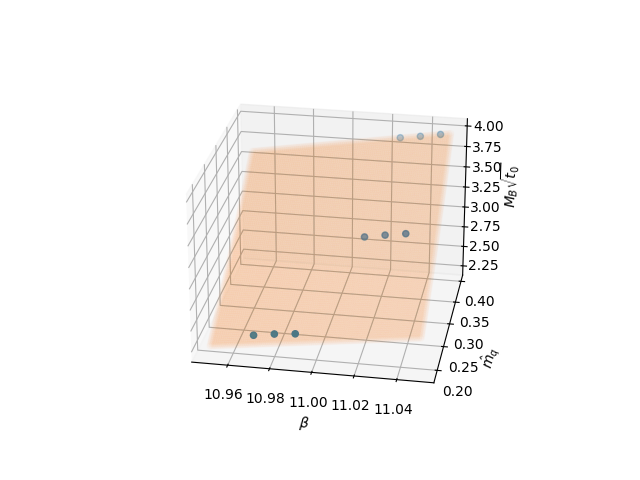

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter( x1, x2, yy )
# ax.scatter( x1, x2, fit_yy )

xx1 = np.repeat(np.linspace(10.95, 11.05, 100), 100).reshape(100,100)
xx2 = np.repeat(np.linspace(0.19, 0.40, 100), 100).reshape(100,100).T
fit_yy = fitter( np.array([xx1,xx2]).T, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4] )
ax.scatter( xx1, xx2, fit_yy, alpha=0.02 )

ax.view_init(elev=25, azim=-80, roll=0)

ax.set_xlabel("$\\beta$")
ax.set_ylabel("$\\hat{m}_q$")
ax.set_zlabel("$M_B\\sqrt{t_0}$")

plt.savefig("MB.pdf", bbox_inches='tight')

In [25]:
np.savetxt( "./coeffs_MB_beta_mqhat.dat", opt_MB_beta_mqhat[0])
np.savetxt( "./cov_MB_beta_mqhat.dat", opt_MB_beta_mqhat[1])

In [26]:
# fitter( np.array([10.95,0.19]).T, 
#                 opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
#                 opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
#                 opt_MB_beta_mqhat[0][4], opt_MB_beta_mqhat[0][5] )

In [27]:
fitter( np.array([10.95,0.19]).T, 
                opt_MB_beta_mqhat[0][0], opt_MB_beta_mqhat[0][1], 
                opt_MB_beta_mqhat[0][2], opt_MB_beta_mqhat[0][3], 
                opt_MB_beta_mqhat[0][4] )

2.254531656873464

In [28]:
cov = opt_MB_beta_mqhat[1]

In [31]:
cov

array([[ 7.85643110e+03, -7.20623092e+02, -2.40691869e+04,
         2.23165890e+03, -8.04754050e+02],
       [-7.20623092e+02,  6.60996525e+01,  2.20647778e+03,
        -2.04591525e+02,  7.39376392e+01],
       [-2.40691869e+04,  2.20647778e+03,  8.15643396e+04,
        -7.54511117e+03,  2.53963450e+03],
       [ 2.23165890e+03, -2.04591525e+02, -7.54511117e+03,
         6.98049590e+02, -2.36282104e+02],
       [-8.04754050e+02,  7.39376392e+01,  2.53963450e+03,
        -2.36282104e+02,  1.00880637e+02]])

In [40]:
cov[ [1,3] ].T[ [1,3] ]

array([[  66.09965254, -204.59152544],
       [-204.59152544,  698.04959047]])